# Probabilistic Analysis and Randomized Algorithms

Src: Chapter 5.1 of Cormen et al. discusses probabilistic analysis and randomized algorithms.
4th edition of CLRS from MIT press
[CLRS on Amazon](https://www.amazon.com/Introduction-Algorithms-fourth-Thomas-Cormen/dp/026204630X)

Probabilistic analysis is a technique used in computer science to analyze algorithms that involve randomness or uncertainty. It involves using probability theory to calculate the expected behavior of an algorithm over many runs, rather than analyzing the behavior of a single run.

Randomized algorithms, on the other hand, are algorithms that make use of random numbers or random choices to solve problems. They can be used to solve problems that are difficult or impossible to solve deterministically, and they are often more efficient than their deterministic counterparts.

Probabilistic analysis is particularly useful for analyzing randomized algorithms, as it allows us to reason about the expected behavior of an algorithm over many runs. For example, if we run a randomized algorithm 100 times and observe that it gives the correct answer 95 times, we can use probabilistic analysis to calculate the probability that the algorithm will give the correct answer on any given run.



## Types of Randomized algorithms

### Las Vegas Algorithms

Las Vegas algorithms are algorithms that always produce the correct answer, but the running time of the algorithm may vary depending on the input. These algorithms use randomness to improve their efficiency, but they always produce the correct answer.

Examples of Las Vegas algorithms include quicksort(with random pivot) and the Miller-Rabin primality test. Quicksort is a sorting algorithm that uses random pivots to improve its efficiency, while the Miller-Rabin primality test is a probabilistic algorithm that uses random numbers to test whether a number is prime.

### Monte Carlo Algorithms

Monte Carlo algorithms are algorithms that may produce incorrect answers with some probability, but they always run in a fixed amount of time. These algorithms use randomness to improve their efficiency, but they may produce incorrect answers with some probability.

Examples of Monte Carlo algorithms include the Solovay-Strassen primality test and the Rabin-Karp string matching algorithm. The Solovay-Strassen primality test is a probabilistic algorithm that uses random numbers to test whether a number is prime, while the Rabin-Karp string matching algorithm is a randomized algorithm that uses random numbers to search for a substring in a string.

## Hire Assistant problem

Suppose you need to hire a new office assistant but your previous attempts have been unsuccessful. To solve this problem, you decide to use an employment agency that will send you one candidate each day for an interview. You have to pay a small fee to the agency for each interview, and hiring an applicant is even more costly as it requires firing your current office assistant and paying a substantial hiring fee to the agency. Since you are committed to having the best possible person for the job, you have decided that if a candidate is more qualified than your current assistant, you will hire the new candidate and fire the current assistant. Although you are willing to pay the resulting cost, you want to estimate the price of this strategy.

![Hire Assistant Problem](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*lXgGoeOwoKEFjXmXRjXZZQ.png)

Src: https://www.cantorsparadise.com/math-based-decision-making-the-secretary-problem-a30e301d8489

## Trivial Case - Instant interviews - no costs to hire and fire

In trivial case, we could simply go through all the applicants and choose the best one (simple O(n) complexity) choose max out of all.

Situation changes if we add costs ("friction")

### Hire assistant problem pseudocode

The following pseudocode describes the algorithm for hiring an office assistant using the employment agency. The algorithm takes as input a list of candidates from the employment agency and returns the cost of hiring and firing office assistants.

* Set the current best candidate to None and the current best candidate's score to 0.
* While there are still candidates from the employment agency:

a. Interview the next candidate.

b. If the candidate's score is higher than the current best candidate's score:

1. Fire the current office assistant.

2. Hire the new candidate.

3. Set the current best candidate to the new candidate.

c. Otherwise, do not hire the candidate.
Return the cost of hiring and firing office assistants.

Note: The exact scoring system used to evaluate candidates is not specified in the problem statement, so it would need to be defined or assumed in the implementation of the procedure. Additionally, the cost of hiring and firing office assistants is not specified, so that would need to be estimated based on the specific circumstances of the problem.

In [29]:
def score(candidate):
    # you could imagine a whole process of interview here which considers 10-50 parameters,
    # 7 rounds of interviews etc etc
    return candidate # for now we assume the candidate is the score, this means candidates are basically numbers in some collection(list, set, etc)

# let's create a simple hiring heuristic that simplye checkes candidate score
def is_hirable(candidate, index, num_candidates, best_score, hire_cost, fire_cost, total_cost, max_budget):
    # if the candidate is better than the best candidate we have seen so far, hire him
    return candidate > best_score

def hire_assistant(candidates,
                   is_hirable_fun=is_hirable,
                   hire_cost=0,
                   fire_cost=0,
                   interview_cost=0,
                   max_budget=0,
                   max_hires=None, # if None we can hire and fire unlimited times if 1 we need to stop after 1 etc
                   debug=True):
    '''
    Default costs represent ideal world where time and money are meaningless...
    '''
    best_candidate = None
    best_score = 0
    total_cost = -fire_cost # hacky way of providing for the first candidate to be hired without firing anyone
    N = len(candidates)
    hire_count = 0

    for index, candidate in enumerate(candidates):
        # Score the candidate (replace this with your own scoring function)
        candidate_score = score(candidate)

        # so this will work like finding max in a list for trivial cases
        if is_hirable_fun(candidate_score, index, N, best_score, hire_cost, fire_cost, total_cost, max_budget):
            # Fire the current office assistant and hire the new candidate
            total_cost += fire_cost + hire_cost
            if debug:
                print(f"Hiring candidate with score {candidate_score}, paying {hire_cost}")
                print(f"paying {fire_cost} to fire {best_candidate}")
                print(f"Total cost now is {total_cost}")

            best_candidate = candidate
            best_score = candidate_score
            hire_count += 1
            if max_hires is not None and hire_count >= max_hires:
                break

        # in any case we have to pay the cost of interview (you and your co-workers spending time with prospect, hotel_rooms, food, etc)
        total_cost += interview_cost

    return total_cost, best_candidate, best_score

In [2]:
import random # we will need a lot of random in this notebook
random.seed(2025)  # so everyone should get same pseudo-randoms
# it is like buying that book of 1 million random numbers on Amazon from 1950s
# here we will make some random scores
random.random() # we could also use randint or even some of the premade distribution

0.5577521702848538

In [3]:
candidates = [round(random.random(),4) for _ in range(20)]
candidates

[0.6458,
 0.4776,
 0.1733,
 0.0004,
 0.9733,
 0.5697,
 0.0658,
 0.4009,
 0.0434,
 0.7673,
 0.982,
 0.0993,
 0.0492,
 0.0279,
 0.5102,
 0.7789,
 0.1943,
 0.1893,
 0.7082,
 0.9812]

In [4]:
# let's run the trivial default case - no costs and we have O(n) complexity
hire_assistant(candidates)

Hiring candidate with score 0.6458, paying 0
paying 0 to fire None
Total cost now is 0
Hiring candidate with score 0.9733, paying 0
paying 0 to fire 0.6458
Total cost now is 0
Hiring candidate with score 0.982, paying 0
paying 0 to fire 0.9733
Total cost now is 0


(0, 0.982, 0.982)

## Knowing the random distribution

In the above example since we know the maximum (1.0) we could premake a rule - heuristic say any candidate over 0.99 is amazing and stop early.

However, this range of scores most likely will not be available in a real life situation.

In [6]:
# how many candidates do we have?
print(f"We have {len(candidates)} candidates")

We have 20 candidates


In [7]:
hire_assistant(candidates,
               is_hirable_fun=is_hirable,
               hire_cost=2_000,
               fire_cost=5_000,
               interview_cost=250)

Hiring candidate with score 0.6458, paying 2000
paying 5000 to fire None
Total cost now is 2000
Hiring candidate with score 0.9733, paying 2000
paying 5000 to fire 0.6458
Total cost now is 10000
Hiring candidate with score 0.982, paying 2000
paying 5000 to fire 0.9733
Total cost now is 18500


(21000, 0.982, 0.982)

## Sorted candidates

In [8]:
# employment agency gives you a list of candidates in already sorted order,
# sadly for you it is ascending and you do not realize that
sorted_candidates = sorted(candidates)
hire_assistant(sorted_candidates, is_hirable_fun=is_hirable,
               hire_cost=2_000,
               fire_cost=5_000,
               interview_cost=200)

Hiring candidate with score 0.0004, paying 2000
paying 5000 to fire None
Total cost now is 2000
Hiring candidate with score 0.0279, paying 2000
paying 5000 to fire 0.0004
Total cost now is 9200
Hiring candidate with score 0.0434, paying 2000
paying 5000 to fire 0.0279
Total cost now is 16400
Hiring candidate with score 0.0492, paying 2000
paying 5000 to fire 0.0434
Total cost now is 23600
Hiring candidate with score 0.0658, paying 2000
paying 5000 to fire 0.0492
Total cost now is 30800
Hiring candidate with score 0.0993, paying 2000
paying 5000 to fire 0.0658
Total cost now is 38000
Hiring candidate with score 0.1733, paying 2000
paying 5000 to fire 0.0993
Total cost now is 45200
Hiring candidate with score 0.1893, paying 2000
paying 5000 to fire 0.1733
Total cost now is 52400
Hiring candidate with score 0.1943, paying 2000
paying 5000 to fire 0.1893
Total cost now is 59600
Hiring candidate with score 0.4009, paying 2000
paying 5000 to fire 0.1943
Total cost now is 66800
Hiring candida

(139000, 0.982, 0.982)

In [30]:
# let's make a new is_hirable function that will simply check for improvement and also for threshold score say 0.9
def is_hirable_thresh(candidate, index, num_candidates, best_score, hire_cost, fire_cost, total_cost, max_budget, threshold=0.9):
    return candidate > best_score and candidate > threshold

hire_assistant(sorted_candidates, is_hirable_fun=is_hirable_thresh,
                hire_cost=2_000,
                fire_cost=5_000,
                interview_cost=200)


Hiring candidate with score 0.9733, paying 2000
paying 5000 to fire None
Total cost now is 5400
Hiring candidate with score 0.9812, paying 2000
paying 5000 to fire 0.9733
Total cost now is 12600
Hiring candidate with score 0.982, paying 2000
paying 5000 to fire 0.9812
Total cost now is 19800


(20000, 0.982, 0.982)

In [31]:
# now let's hire assistant when max_hires is 1
hire_assistant(sorted_candidates, is_hirable_fun=is_hirable_thresh,
                hire_cost=2_000,
                fire_cost=5_000,
                interview_cost=200,
                max_hires=1)
# if we are allowed to only hire one person then we stop early

Hiring candidate with score 0.9733, paying 2000
paying 5000 to fire None
Total cost now is 5400


(5400, 0.9733, 0.9733)

In [32]:
def make_hirable_function_with_threshold(threshold_value):
    """Function factory to create an is_hirable function with a specific threshold."""
    def is_hirable_with_custom_thresh(candidate, index, num_candidates, best_score, hire_cost, fire_cost, total_cost, max_budget):
        return candidate > best_score and candidate > threshold_value
    return is_hirable_with_custom_thresh

# Example usage:
thresh_07_hirable_func = make_hirable_function_with_threshold(0.7)
hire_assistant(candidates, is_hirable_fun=thresh_07_hirable_func, hire_cost=2_000, fire_cost=5_000, interview_cost=200)

Hiring candidate with score 0.9732920257423255, paying 2000
paying 5000 to fire None
Total cost now is 3000
Hiring candidate with score 0.9820040045345766, paying 2000
paying 5000 to fire 0.9732920257423255
Total cost now is 11200
Hiring candidate with score 0.9880613579323857, paying 2000
paying 5000 to fire 0.9820040045345766
Total cost now is 22800


(36000, 0.9880613579323857, 0.9880613579323857)

### Knowing threshold algorithm

If you know the distribution of the candidates, you could sort them and then choose the best one that is above a certain threshold. This is a deterministic algorithm.

## Solution when you suspect a sorted list

You would shuffle it, and avoid the pain and cost of hiring and firing so many people (or so many marriages...)

We saw this approach with quicksort where we could select a random pivot to avoid the worst case scenario.

Of course good shuffling is not trivial and also costs time.


### Hire assistant problem implementation explanation

Above code takes in a list of candidates, the cost of hiring a new office assistant, and the cost of firing the current office assistant. It then iterates through each candidate and evaluates them using the score() function (which you would need to define or replace with your own scoring function). If the candidate has a higher score than the current best candidate, the code fires the current office assistant, hires the new candidate, and updates the best_candidate and best_score variables. If the candidate has a lower or equal score, the code does not hire them and only adds the hire_cost to the total_cost. Finally, the code returns the total cost of hiring and firing office assistants.

## Online Decision Problem

An online decision problem is a problem where the input is revealed over time and decisions must be made without complete knowledge of the future input. In other words, the algorithm must make decisions without seeing the entire input in advance.

In contrast, an offline decision problem is one where the entire input is known in advance and the algorithm can take as much time as it needs to make a decision.

Online decision problems are common in many areas of computer science, including optimization, game theory, machine learning, and networking. In these problems, the algorithm must make decisions based on incomplete information, and the goal is usually to minimize some measure of cost or maximize some measure of performance.

The Hire Assistant problem is an example of an online decision problem because the candidates are revealed over time, and the algorithm must make a decision after each candidate is evaluated, without knowledge of future candidates. Similarly, other examples of online decision problems include routing packets in a computer network, scheduling tasks on a processor, or bidding in an auction.

## Monte Carlo Simulation

Monte Carlo Method is a computational algorithm that uses random sampling to estimate the solutions to problems in various fields such as physics, engineering, finance, and computer science. It is named after the famous Monte Carlo Casino in Monaco, where games of chance use random numbers to determine the outcome.

The Monte Carlo method typically involves simulating a large number of random samples or scenarios to generate estimates of complex systems or problems that are difficult to solve analytically. These random samples are used to estimate probabilities or expected values of the system or problem under investigation.

For example, in physics, the Monte Carlo method is used to simulate the behavior of particles in a system by generating random positions and velocities for each particle and then computing the resulting behavior of the system. In finance, Monte Carlo simulations are used to estimate the value of financial instruments such as options or bonds, by simulating a large number of possible future scenarios and calculating the expected value of the instrument under each scenario.

The Monte Carlo method can be particularly useful in situations where the problem is too complex to be solved analytically, and there are many sources of randomness or uncertainty involved. However, the accuracy of Monte Carlo simulations depends on the number of samples or scenarios simulated, and in some cases, the method can be computationally expensive.

We can simulate the Hire Assistant problem using the Monte Carlo method, which is a probabilistic algorithm that uses random sampling to obtain numerical results.

Here's how we can use Monte Carlo method to simulate the Hire Assistant problem:

1. Generate a large number of candidate pools, each containing a random permutation of the same set of candidates.
2. For each candidate pool, run the Hire Assistant algorithm on the candidates and record the total cost of hiring and firing assistants.
3. Compute the average cost over all the candidate pools to obtain an estimate of the expected cost.

## Law of Large Numbers

* https://en.wikipedia.org/wiki/Law_of_large_numbers

![Fair Dice](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Lawoflargenumbers.svg/450px-Lawoflargenumbers.svg.png)
### Wisdom of the crowds

### Reversal to the mean

In [15]:
throws = 1
random.seed(2025)
throw_dict = {}
for _ in range(7):
    throws *= 10
    # print(f"Throwing  dice{throws} times")
    dice_throws = [random.randint(1,6) for _ in range(throws)]
    # throw_dict[throws] = dice_throws
    avg = sum(dice_throws) / throws
    throw_dict[str(throws)] = avg
    print(f"Average dice from {throws} is {avg}")

Average dice from 10 is 3.6
Average dice from 100 is 3.42
Average dice from 1000 is 3.437
Average dice from 10000 is 3.5051
Average dice from 100000 is 3.50184
Average dice from 1000000 is 3.500369
Average dice from 10000000 is 3.4998721


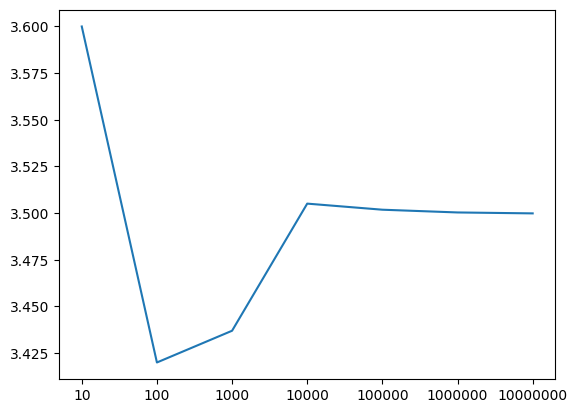

In [16]:
# let's plot the dictionary
import matplotlib.pyplot as plt
plt.plot(throw_dict.keys(), throw_dict.values())
plt.show()

In [ ]:
random.sample([1,2,3,4], 4) # we return a random sample without replacement - meaning we do not get doubles

[3, 1]

In [17]:
## Monte Carlo Simulation

# import random

def hire_assistant_simulate(candidates, hire_cost, fire_cost, interview_cost, num_simulations, is_hirable_fun=is_hirable, max_budget=0, debug=False):
    total_cost = 0
    total_score = 0 # we will see how well we do on the candidates
    n = len(candidates)

    for i in range(num_simulations):
        # Generate a random permutation of the candidates
        candidate_pool = random.sample(candidates, n)

        # Run the Hire Assistant algorithm on the candidate pool and record the cost
        cost, best_candidate, best_score = hire_assistant(candidate_pool, is_hirable_fun, hire_cost, fire_cost, interview_cost, max_budget=max_budget, debug=debug)
        total_cost += cost
        total_score += best_score


    # Compute the average cost over all the simulations
    average_cost = total_cost / num_simulations
    average_score = total_score / num_simulations
    return average_cost, average_score

In [18]:
# so we will calculate the average cost of hiring assistant for 100_000 simulations
# this is using the basic is_hirable function the default one
hire_assistant_simulate(candidates, hire_cost=2_000, fire_cost=5_000, interview_cost=200, num_simulations=100_000)
# not surprisingly we always get the best candidate, because we are checking every applicant

(24138.19, 0.9820000000023951)

In [19]:
# let's try the threshold function
hire_assistant_simulate(candidates, hire_cost=2_000, fire_cost=5_000, interview_cost=200, num_simulations=100_000, is_hirable_fun=is_hirable_thresh)
# so knowing a good threshold is important, because if you set it too high you might not hire anyone
# if you set it too low you might hire too many people

(11825.82, 0.9820000000023951)

In [21]:
# let's make a new is_hirable_thresh function with 0.80 threshold
# let's make a new is_hirable function that will simply check for improvement and also for threshold score say 0.9
def is_hirable_thresh_07(candidate, index, num_candidates, best_score, hire_cost, fire_cost, total_cost, max_budget, threshold=0.7):
    return candidate > best_score and candidate > threshold

hire_assistant_simulate(candidates, hire_cost=2_000, fire_cost=5_000, interview_cost=200, num_simulations=100_000, is_hirable_fun=is_hirable_thresh_07)

(16161.2, 0.9820000000023951)

In [ ]:
# TODO think how lowering and rising our standards affects our costs but also risks of NOT hiring anyone

## When distribution of scores is not known

In previous case we knew the scores 0 to 1

If we do not know the distribution of scores we need to learn it from applicants

https://en.wikipedia.org/wiki/Secretary_problem

Difficulty lies that we have to make one choice to hire and that is it

Statistically it is proven that n/e (e as in Euler's constant) candidates should be skipped - used for learning the distribution

After that you simply take the first score that is higher than the highest score in first n/e candidates.

Again this is only about 37% of working perfectly.

Worst case scenario you hire the last person - who could be really bad

This worst case scenario would require you that you strike out on 63 persons being worse than the best person from first 36

In other words the best person was in the first 36

In [22]:
import math
math.e

2.718281828459045

In [23]:
100/math.e

36.787944117144235

In [ ]:
## TODO Do simulation to empirically show that n/e is optimal
## TODO show mathematical proof of n/e

In [ ]:
## TODO write simulation to prove how n/e approach works
# def hire(candidates, threshold):


In [24]:
# now let's write a function that consides the index as well as number of candidates
# so we will utilize the n/e rule
def is_hirable_n_e(candidate, index, num_candidates, best_score, hire_cost, fire_cost, total_cost, max_budget):
    return candidate > best_score and index < num_candidates / math.e

# unfortunately this will not work because we will not be saving the best scores in the n/e section

In [25]:
# so let's implement the n/e rule from scratch we will take a list of candidates and return the best candidate using n/e rule
def hire(candidates):
    n = len(candidates)
    best_candidate = None
    best_score = 0
    for index, candidate in enumerate(candidates):
        # the learning section
        if candidate > best_score:
            best_candidate = candidate
            best_score = candidate
            # the n/e section when we already have the best candidate assuming our limitations
            if index > n / math.e:
                return best_candidate
    # the final return
    # we have to hire the last one....
    return candidate

# to test it we will use 100_000 simulations
# we will take 100 candidates in random order and see how many times we get the best candidate
num_simulations = 100_000
n = 100
random.seed(2025)
candidates = [random.random() for _ in range(n)]
num_successes = 0
best_candidates = []
for _ in range(num_simulations):
    candidate_pool = random.sample(candidates, n)
    best_candidate = hire(candidate_pool)
    best_candidates.append(best_candidate)
    if best_candidate == max(candidate_pool): # we could possibly optimize this part by caching the max candidate since the pool is acually same just shuffled
        num_successes += 1

num_successes / num_simulations


0.37385

In [26]:
# let's count the best candidates
from collections import Counter
counts = Counter(best_candidates)
counts

Counter({0.9820040045345766: 13992,
         0.9880613579323857: 37385,
         0.9732920257423255: 3341,
         0.2756827290775401: 396,
         0.6385368995064133: 354,
         0.9403045980766311: 1146,
         0.9212806259117547: 770,
         0.981226174429622: 6502,
         0.5577562685816251: 377,
         0.7082298787529174: 372,
         0.5822139638206519: 401,
         0.5527239886594069: 358,
         0.6806630957023727: 353,
         0.04923005858381713: 349,
         0.9467488890936051: 1884,
         0.6873793902482761: 371,
         0.5439628849267676: 383,
         0.17233209950438488: 362,
         0.8223861733786415: 380,
         0.2799425125101659: 373,
         0.7570190336432753: 370,
         0.4466585854559678: 372,
         0.9076944513662878: 498,
         0.5577521702848538: 354,
         0.40087281985351797: 374,
         0.27776538165505404: 368,
         0.799103109516607: 391,
         0.5736537680608323: 413,
         0.25936699421506504: 377,
   

In [27]:
# how many keys in counts are there
len(counts)

100

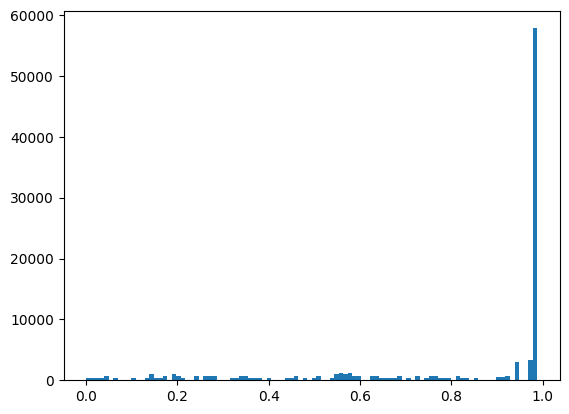

In [28]:
# let's plot a histogram of the best candidates
import matplotlib.pyplot as plt
plt.hist(best_candidates, bins=100)
plt.show()

## Other versions of secretary problem

### Multiple hires - k-choice secretary problem

In this case you can hire k people

### Hiring and firing

In this case you can hire and fire - we saw this today

### Hiring and firing with costs

Again we saw this today

### Unknown number of applicants

In this case you do not know how many applicants there will be. You can only hire the last one. This variant is also known as the "stop rule" problem.

### Adversarial secretary problem

In this case the applicants are not random but adversarial - they are trying to make you hire the worst person. Think evil employment agency.

### Distributed secretary problem

In this case you have multiple offices and you need to hire the best person for each office. You can only hire one person per office. You might have multiple agents that are trying to hire the best person for each office.

### Secretary problem with deadlines, group interviews, and other variants

There are countless other variants of the secretary problem, including ones with deadlines, group interviews, and other constraints. Each variant presents its own unique challenges and opportunities for analysis and optimization.



## Side Story - Calculating Pi via Monte Carlo method

To calculate the value of pi using the Monte Carlo method, we can use a probabilistic approach that involves simulating a large number of random points in a square and calculating the proportion of those points that lie inside a quarter-circle inscribed in the square. The value of pi can then be estimated based on the ratio of the area of the quarter-circle to the area of the square.

Here are the steps to calculate the value of pi using Monte Carlo method:

* Generate a large number of random points within a square with sides of length 2 centered at the origin.
* Count the number of points that lie inside the quarter-circle of radius 1 centered at the origin.
* Estimate the area of the quarter-circle as the proportion of points inside the quarter-circle to the total number of points generated.
* Estimate the value of pi as four times the estimated area of the quarter-circle.

![Circle](https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Pi_30K.gif/440px-Pi_30K.gif)

In [33]:
# import random

def estimate_pi(num_points):
    num_points_in_circle = 0
    for _ in range(num_points):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        if x**2 + y**2 <= 1: # this is kind of slow because of the square root
            num_points_in_circle += 1
    pi_estimate = 4 * num_points_in_circle / num_points
    return pi_estimate

# This code takes in the number of points to generate,
#  generates random points within a square of length 2 centered at the origin,
# counts the number of points that lie inside the quarter-circle of radius 1 centered at the origin,
# estimates the area of the quarter-circle as the proportion of points
# inside the quarter-circle to the total number of points generated,
# and estimates the value of pi as four times the estimated area of the quarter-circle.
#  The more points generated, the more accurate theb estimate of pi will be.

In [34]:
throws = 1
for _ in range(7):
    throws *= 10
    # print(f"Throwing  dice{throws} times")
    print(f"Average PI from {throws} pins is {estimate_pi(throws)}")

# so takes about 10 Million throws to get 2 digits of precision, not very practical for PI but still useful in general


Average PI from 10 pins is 2.8
Average PI from 100 pins is 2.92
Average PI from 1000 pins is 3.136
Average PI from 10000 pins is 3.1432
Average PI from 100000 pins is 3.14068
Average PI from 1000000 pins is 3.145976
Average PI from 10000000 pins is 3.1413104


## Side story: The Monty Hall Problem

![Goat](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/440px-Monty_open_door.svg.png)

## TODO time allowing or next time

The Monty Hall problem is a famous probability puzzle that is named after the host of the game show "Let's Make a Deal," Monty Hall. The problem is based on a hypothetical game show where a contestant is presented with three doors. Behind one of the doors is a valuable prize, while the other two doors hide goats.

The contestant chooses one of the three doors, but before the chosen door is opened, the host (Monty Hall) opens one of the other two doors to reveal a goat. The contestant is then given the option to stick with their original choice or switch to the other unopened door.

The question is whether the contestant should stick with their original choice or switch to the other door in order to increase their chances of winning the prize. The answer may seem counterintuitive, but switching actually increases the contestant's chances of winning the prize from 1/3 to 2/3. This is because when the contestant first made their choice, they had a 1/3 chance of being correct. When the host opened one of the other doors to reveal a goat, the remaining unopened door had a 2/3 chance of hiding the prize.

### Correct strategy for Monty Hall problem

The correct strategy for the Monty Hall problem is to always switch to the other unopened door. This is because the contestant's initial choice has a 1/3 chance of being correct, and the host's choice of door to open has a 2/3 chance of being incorrect. Therefore, the contestant's chances of winning the prize are 1/3 * 2/3 = 2/3 when they switch doors.

Famously in 1990, the question was discussed in Parade magazine in 1990 when the problem was solved by mathematician Marilyn vos Savant.

Wiki: https://en.wikipedia.org/wiki/Monty_Hall_problem

In [35]:

def monty_hall_simulation(switch):
    doors = ["goat", "goat", "car"]
    random.shuffle(doors)
    chosen_door = random.choice(doors)
    if chosen_door == "car":
        if switch: # so we chose the switch strategy and were unlucky to have chosen the car already - so we get goat
            return 0
        else: # no switch strategy - stay put
            return 1
    else: # when we have chosen a goat
        if switch: # we apply switch strategy
            return 1  # we win the car
        else:  # stay put strategy fails here - we end up with the goat
            return 0

num_simulations = 1_000_000
switch = True
wins = 0

for i in range(num_simulations):
    wins += monty_hall_simulation(switch)

print(f"Probability of winning with switch: {wins / num_simulations:.4f}")
print(f"Probability of winning without switch: {(num_simulations - wins) / num_simulations:.4f}")

Probability of winning with switch: 0.6670
Probability of winning without switch: 0.3330


In [36]:
num_simulations = 1_000_000
switch = False
wins = 0

for i in range(num_simulations):
    wins += monty_hall_simulation(switch)

print(f"Probability of winning without switch: {wins / num_simulations:.4f}")
print(f"Probability of winning WITH switch: {(num_simulations - wins) / num_simulations:.4f}")

Probability of winning without switch: 0.3339
Probability of winning WITH switch: 0.6661


## Using random simulation to obtain answers

So if you have trouble coming up with an answer to some algorith, you can use simulation to come up with a good aproximation.

Key idea is to have some knowledge of distribution of inputs.

## Jupyter %%timeit also works on this principle

In [37]:
%%timeit
sorted(list(range(1_000_000)))

30.6 ms ± 652 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Optimal Stopping Problem

The Hire Assistant problem is a classic example of an online decision problem in which we need to make a sequence of decisions without having full information about future events. The goal is to hire the best candidate while minimizing the total cost of hiring and firing assistants.

The optimal approach to solving the Hire Assistant problem is to use an algorithm called the "optimal stopping rule." This rule states that we should interview and evaluate the first k candidates, where k is a fixed number, and then hire the first candidate that is better than all the previous candidates. The value of k is determined by the expected number of candidates that we need to interview before finding the best candidate.

The expected number of candidates to be interviewed can be calculated as follows:

* Let n be the total number of candidates provided by the employment agency.
* Let p be the probability that a candidate is better than all the previous candidates.
* The expected number of candidates to be interviewed is given by n/p.
* Therefore, the optimal approach is to interview and evaluate the first k = n/e candidates, where e is the mathematical constant equal to approximately 2.71828. After evaluating the first k candidates, we hire the first candidate that is better than all the previous candidates.

This approach guarantees that we will hire the best candidate with a probability of approximately 1/e, and it minimizes the expected cost of hiring and firing assistants.

Note: he optimal stopping rule is based on mathematical analysis of the problem, and is derived using techniques such as probability theory and calculus. The rule is not guaranteed to always produce the best result, but in the long run, it is the most effective strategy for hiring the best candidate while minimizing the total cost.

## Other Algorithms that use randomness

### Matrix Operations

* https://tropp.caltech.edu/notes/Tro20-Randomized-Algorithms-LN.pdf
* There are some Latvian researchers that have done work in this field

In [ ]:
## TODO more randomized algorithms

